# Trabajo Parcial - Física

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
        
def setPlot(a, b):
    width = a
    height = b
    plt.figure(figsize=(width, height))

# 1. Movimiento de un paracaidista

## a. Parámetros

|               Parámetros                           |       Valores      |
|:----------------------------------------------------|:------------------:|
| Coeficiente de resistencia (C<sub>D</sub>)         |     1,17           |
| Densidad del aire (kg/m<sup>3</sup>)               |     1,20           | 
| Masa del paracaidista (kg)                         |     80, 0          | 
| Área transversal del paracaidista (m<sup>2</sup>)  |    [6,00; 10,0]    | 
| Rapidez inicial (m/s)                              |    [0,00; 5,00]    | 
| Tiempo en que abre el paracaídas (s)               |    [15,0; 23,0]    |
| Altura inicial (m)                                 |    [3 000; 3 500]   |

In [2]:
resistencia = 1.17
densidad_aire = 1.20
masa = 80.00
area = float(format(random.uniform(6, 10), '.2f'))
rapidez_i = float(format(random.uniform(0, 5), '.2f'))
tiempo_abre_paracaidas = float(format(random.uniform(15, 23), '.2f'))
altura_i = float(format(random.uniform(3000,3500), '.2f'))

gravedad = -9.81
k = (resistencia * densidad_aire * area) / 2

In [3]:
print("Resistencia: {0:.2f}".format(resistencia))
print("Densidad del aire: {0:.2f}".format(densidad_aire))
print("Masa del paracaidista: {0:.2f}".format(masa))
print("Area transversal paracaidista: ", area)
print("Rapidez inicial: ",rapidez_i)
print("Tiempo en que se abre el paracaidas: ", tiempo_abre_paracaidas)
print("Altura inicial: ", altura_i)

print("Gravedad: ", gravedad)
print("Constante 'k': {0:.2f}".format(k))

Resistencia: 1.17
Densidad del aire: 1.20
Masa del paracaidista: 80.00
Area transversal paracaidista:  6.42
Rapidez inicial:  0.44
Tiempo en que se abre el paracaidas:  17.31
Altura inicial:  3344.84
Gravedad:  -9.81
Constante 'k': 4.51


## b. Generación de datos (posición, velocidad y aceleración)

$$tap = tiempo\hspace{1mm}abre\hspace{1mm}paracaidas $$

$$tde = tiempo\hspace{1mm}de\hspace{1mm}equilibrio $$

### Posición

$$x_{(t)} =     \left \{ \begin{array}{rcl}
x_0 + v_0t + \frac{1}{2}at^2 & \mbox{,} & 0\leq t < tap \\ 
\iint a_{(t)} dt & \mbox{,} & tap \leq t < tde \\
x_{(tde)} + v(t-tde) & \mbox{,} & tde \leq t < tiempo\hspace{1mm}final
\end{array}\right.$$

### Velocidad

$$v_{(t)} =     \left \{ \begin{array}{rcl}
v_0 + at & \mbox{,} & 0\leq t < tap \\ 
\int a_{(t)} dt & \mbox{,} & tap \leq t < tde \\
\sqrt{\frac{m \mid g \mid}{k}} & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

### Aceleración

$$a_{(t)} =     \left \{ \begin{array}{rcl}
g & \mbox{,} & 0\leq t < tap \\ 
{\displaystyle \frac{mg + kv_{(t)}^2}{m}}  & \mbox{,} & tap \leq t < tde \\
0 & \mbox{,} & tde \leq t \leq tiempo\hspace{1mm}final
\end{array}\right.$$

In [4]:
posicion = []
velocidad = []
aceleracion = []
fuerza = []
tiempo = []

tap = tiempo_abre_paracaidas

t = 0
dt = 0.001
v = rapidez_i + gravedad * tap
f = masa * gravedad + k * pow(v, 2)
a = f / masa
y = altura_i + (rapidez_i + v) * tap / 2

def grabarDatos():
    posicion.append(y)
    tiempo.append(t + tap)
    velocidad.append(v)
    aceleracion.append(a)
    fuerza.append(f)
    

while ( a > 0.00001):
    
    grabarDatos();
    
    t = t + dt      
    v = v + a * dt
    f = masa * gravedad + k * pow(v, 2)
    a = f / masa
    y = y + ((velocidad[-1] + v) * dt / 2)
    
tde = tap + t
y_tde = y
tf = tde + y_tde / v * -1

def vel(t):
    if(t < tap):
        return rapidez_i + gravedad * t
    elif (t >= tde):
        return v
    
def acl(t):
    if(t < tap):
        return gravedad
    elif (t >= tde):
        return 0

def pos(t):
    if(t < tap):
        return altura_i + (rapidez_i + vel(t)) * t / 2
    elif (t >= tde):
        return y_tde + v * (t - tde)

tiempo_t = [t for t in my_range(0, tap - 0.001, 0.001)] + tiempo + [t for t in my_range(tde, tf, 0.001)]
posicion_t = [pos(t) for t in my_range(0, tap - 0.001, 0.001)] + posicion + [pos(t) for t in my_range(tde, tf, 0.001)]
velocidad_t = [vel(t) for t in my_range(0, tap - 0.001, 0.001)] + velocidad + [vel(t) for t in my_range(tde, tf, 0.001)]
aceleracion_t = [acl(t) for t in my_range(0, tap - 0.001, 0.001)] + aceleracion + [acl(t) for t in my_range(tde, tf, 0.001)]

df= pd.DataFrame({
    '1. Tiempo': tiempo_t,
    '2. Y': posicion_t,
    '3. V': velocidad_t,
    '4. A': aceleracion_t
})

datos = pd.concat([df[df.index % 1000 == 0], df[df.index == len(df.index) - 1]])

### Presentación de resultados

In [5]:
datos

,1. Tiempo,2. Y,3. V,4. A
0,0.000,3344.840000,0.440000,-9.810000
1000,1.000,3340.375000,-9.370000,-9.810000
2000,2.000,3326.100000,-19.180000,-9.810000
3000,3.000,3302.015000,-28.990000,-9.810000
4000,4.000,3268.120000,-38.800000,-9.810000
5000,5.000,3224.415000,-48.610000,-9.810000
6000,6.000,3170.900000,-58.420000,-9.810000
7000,7.000,3107.575000,-68.230000,-9.810000
8000,8.000,3034.440000,-78.040000,-9.810000
9000,9.000,2951.495000,-87.850000,-9.810000


## c. Gráficos

### 1. Posición vs tiempo

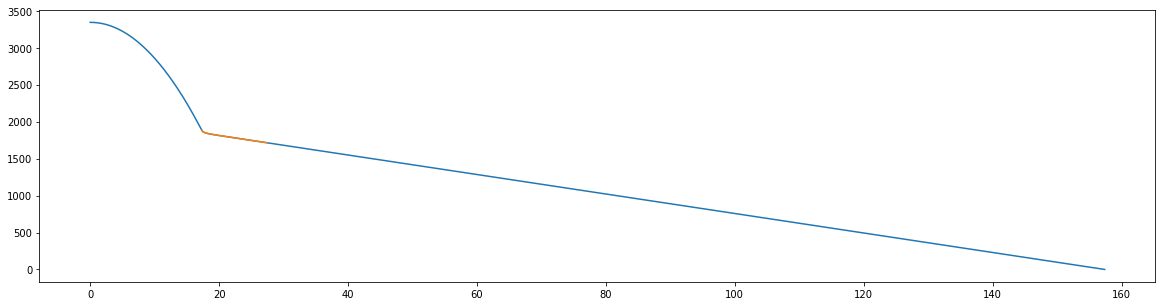

In [6]:
setPlot(20, 5)

plt.plot(tiempo_t, posicion_t)
plt.plot(tiempo, posicion)
plt.show()

### 2. Velocidad vs tiempo

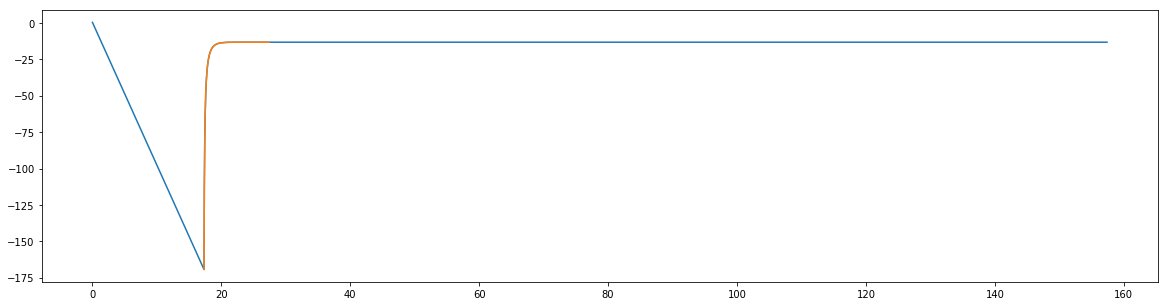

In [7]:
setPlot(20, 5)

plt.plot(tiempo_t, velocidad_t)
plt.plot(tiempo, velocidad)
plt.show()

### 3. Aceleración vs tiempo

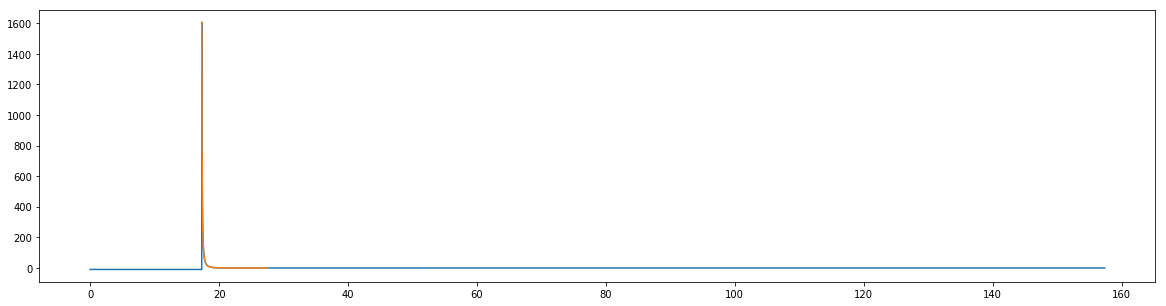

In [8]:
setPlot(20, 5)

plt.plot(tiempo_t, aceleracion_t)
plt.plot(tiempo, aceleracion)
plt.show()

### 4. Fuerza de arrastre vs tiempo

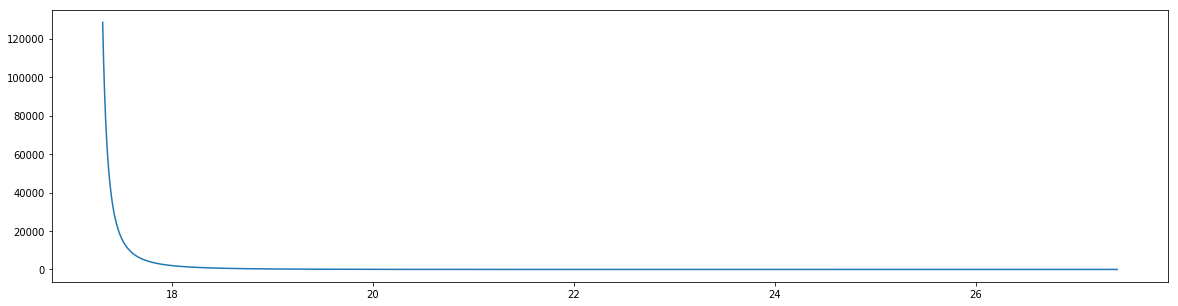

In [9]:
setPlot(20, 5)

plt.plot(tiempo, fuerza)
plt.show()

### 5. Comparativa de la velocidad, aceleración y posición durante la resolucion de las ecuaciones diferenciales

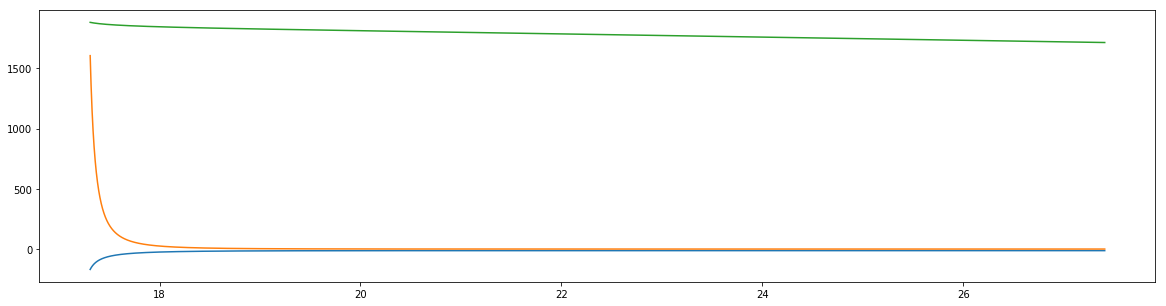

In [10]:
setPlot(20, 5)
plt.plot(tiempo, velocidad)
plt.plot(tiempo, aceleracion)
plt.plot(tiempo, posicion)
plt.show()